In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
import scipy.stats



## **2**

In [4]:

B_0 = 0.061  # [mT]
B = [0.073, 0.075, 0.080, 0.096, 0.116, 0.130, 0.137, 0.159, 0.165, 0.169, 0.182, 0.190, 0.198, 0.205, 0.209, 0.217, 0.231]  # [mT]
B_clean = []

for k in B:
    B_clean.append((k - B_0) / 1000)  # Conversión de mT a T
I=np.array([0.09,0.15,0.20,0.41,0.65,0.84,0.94,1.12,1.25,1.33,1.51,1.62,1.73,1.80,1.90,1.95,2.01]) #[A]

In [5]:
B_0 = 0.061  # [mT]
B = [0.073, 0.075, 0.080, 0.096, 0.116, 0.130, 0.137, 0.159, 0.165, 0.169, 0.182, 0.190, 0.198, 0.205, 0.209, 0.217, 0.231]  # [mT]
B_clean_mT = []

for k in B:
    B_clean_mT.append((k - B_0) /1)  # MT


In [6]:
def desviacion_estandar(datos):
    # Calcular la media
    n = len(datos)
    media = sum(datos) / n
    
    # Calcular la suma de los cuadrados de las diferencias con la media
    suma_cuadrados = sum((x - media) ** 2 for x in datos)
    
    # Calcular la desviación estándar (para una muestra, usa n-1)
    desviacion =np.sqrt(suma_cuadrados / (n - 1))
    
    return desviacion

In [7]:
print(desviacion_estandar(B_clean))

5.2351259887081094e-05


In [8]:
N=len(B_clean)
# Función objetivo que se debe minimizar
def modelo(m):
    return np.sum((B_clean - m*I)**2)

# Establecer un valor inicial 
valor_inicial = 1  # Valor Resistencia dada por fabricante

# Utilizar minimize para encontrar que minimice la función objetivo
resultado = optimize.minimize(modelo, valor_inicial)

# El valor de Rv que minimiza la función objetivo
min = resultado.x[0]

print("El coeficiente de proporcionalidad es", min)

El coeficiente de proporcionalidad es 8.10386817945239e-05


In [9]:
mu0=4*np.pi*10**(-7)
R=0.0705 #[m] este es el promedio del radio interno y externo
vueltas=10
def Besp(I):
    return (mu0*I*vueltas)/(2*R)

In [10]:
import numpy as np

def chi_squared(observed, expected, errors):
    # Calcula el chi cuadrado usando la fórmula.
    chi2 = np.sum(((observed - expected) ** 2) / (errors ** 2))
    
    return chi2
# B +- 0.02
sigma_B=3e-6
chi2_value = chi_squared(B_clean, min*I, sigma_B)
print(f"Valor de chi cuadrado: {chi2_value}")
print(chi2_value/17)


Valor de chi cuadrado: 23.741909509938957
1.3965829123493503


In [11]:
print(len(B_clean))

17


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_12692\4152573595.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(I,Besp(I),color="red",label="$B(I)=\mu_0IN/2R$",linestyle='--')
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_12692\4152573595.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(I,8.10*10**(-5)*I,color="blue",label="$B(I)=8.10$ $\\times$ $10^{-5}\cdot I$")


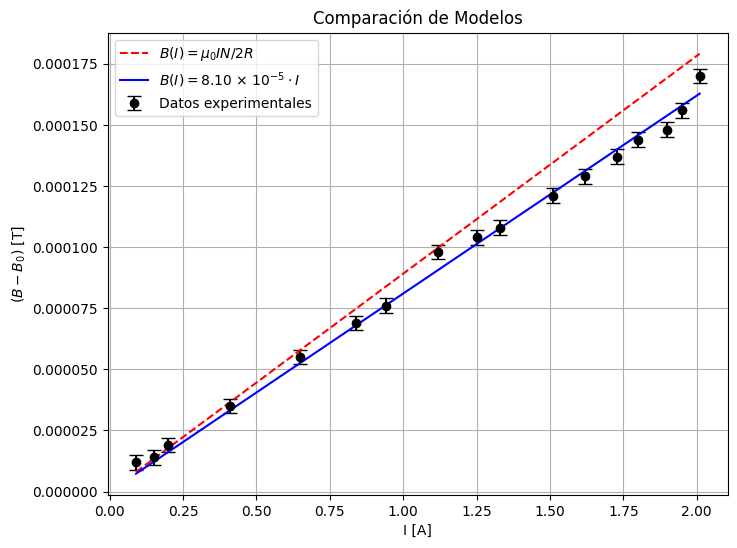

In [12]:
plt.figure(figsize=(8, 6))
plt.errorbar(I, B_clean,color="black", yerr=0.000003, fmt='o', label='Datos experimentales', capsize=5)
plt.plot(I,Besp(I),color="red",label="$B(I)=\mu_0IN/2R$",linestyle='--')
plt.plot(I,8.10*10**(-5)*I,color="blue",label="$B(I)=8.10$ $\\times$ $10^{-5}\cdot I$")
plt.grid()
plt.xlabel("I [A]");plt.ylabel('$(B - B_0)$ [T]')
plt.title("Comparación de Modelos")
plt.legend()

In [13]:
def calcular_correlacion(lista1, lista2):
    if len(lista1) != len(lista2):
        raise ValueError("Las listas deben tener la misma longitud.")
    
    # Convertir a arrays de numpy para facilitar el cálculo
    array1 = np.array(lista1)
    array2 = np.array(lista2)
    
    # Calcular la correlación usando numpy
    correlacion = np.corrcoef(array1, array2)[0, 1]
    return correlacion



resultado = calcular_correlacion(Besp(I),8.10*10**(-5)*I)
print(f"La correlación entre las dos listas es: {resultado}")

La correlación entre las dos listas es: 0.9999999999999999


## **3**

In [14]:
# Constantes dadas
mu0 = 4 * np.pi * 10**(-7)  # permeabilidad del vacío
R = 0.0705  # radio promedio [m]
vueltas = 10  # número de vueltas
B0 = 0.061  # mT (ajuste)

In [15]:
# Datos experimentales de la tabla (distancias en cm convertidas a m y B en mT)
z = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]) * 1e-2  # [m]
B_clean2 = np.array([0.121, 0.111, 0.096, 0.081, 0.070, 0.056, 0.046, 0.037, 0.030, 0.025, 0.020, 0.018, 0.016, 0.008])*1e-3  # [T]

In [16]:
# Función teórica B(z) = A / (z^2 + R^2)^(3/2) ##################################################################################
def B_teo(A):
    return A / (z**2 + R**2)**(3/2)

In [17]:
# Función de chi cuadrado
def prop(A):
    B_model = B_teo(A)
    return (np.sum((B_clean2 - B_model)))**2
valor_inicial=5
# Utilizar minimize para encontrar que minimice la función objetivo
resultado = optimize.minimize(prop, valor_inicial)

# El valor de Rv que minimiza la función objetivo
min = resultado.x[0]

print("El coeficiente de proporcionalidad es", 3.61e-8)

El coeficiente de proporcionalidad es 3.61e-08


In [18]:
import numpy as np

def chi_squared(observed, expected, errors):
    # Calcula el chi cuadrado usando la fórmula.
    chi2 = np.sum(((observed - expected) ** 2) / (errors ** 2))
    
    return chi2
# B +- 0.002

chi2_value = chi_squared(B_clean2, B_teo(3.61e-8), 0.000004) #### aki le puse 4 en vez de 3
print(f"Valor de chi cuadrado: {chi2_value}")
print(chi2_value/14)

Valor de chi cuadrado: 30.575702978429156
2.183978784173511


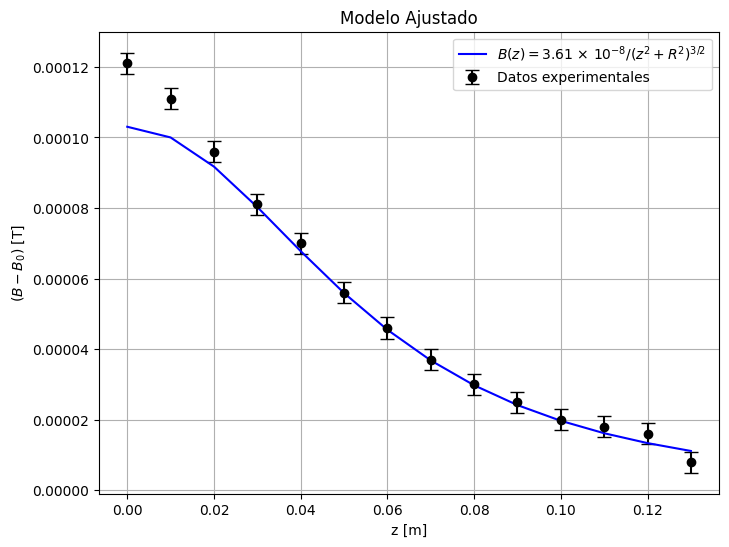

In [19]:

plt.figure(figsize=(8, 6))
plt.errorbar(z, B_clean2, yerr=0.000003, color="black",fmt='o', label='Datos experimentales', capsize=5)
plt.plot(z, B_teo(3.61e-8), label="$B(z)=3.61$ $\\times$ $10^{-8}/(z^2+R^2)^{3/2}$", color='blue')
plt.xlabel('z [m]')
plt.ylabel('$(B - B_0)$ [T]')
plt.title('Modelo Ajustado')
plt.legend()
plt.grid(True)


In [20]:
def B_biot_savart(z):
    return (10*mu0*1.47*0.0705**2)/(z**2 + R**2)**(3/2)


In [21]:
z_fit = np.linspace(0, 0.13, 100)
B_biot_fit = B_biot_savart(z_fit)

In [22]:
print(B_clean2)

[1.21e-04 1.11e-04 9.60e-05 8.10e-05 7.00e-05 5.60e-05 4.60e-05 3.70e-05
 3.00e-05 2.50e-05 2.00e-05 1.80e-05 1.60e-05 8.00e-06]


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_12692\1868277987.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(z_fit, 4.59e-8/(z_fit**2 +R**2)**(3/2),label="$B(z)=\mu_0 I R^2 N/2(z^2+R^2)^{3/2}$", color='red',linestyle='--') ######### AQUÍ EL 4.59 LO PUSE A MANO NOMAS, PERO ES LA CTE DE =mu0*1.47*10*0.0705^2 /2


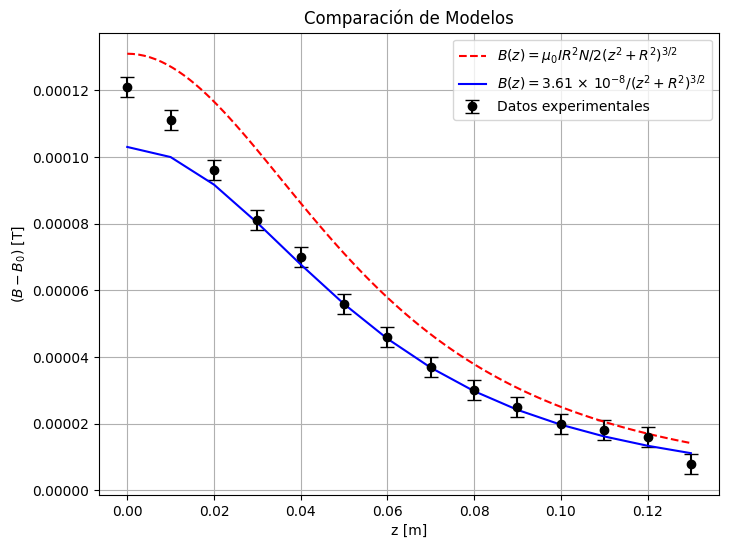

In [23]:
plt.figure(figsize=(8, 6))
plt.errorbar(z, B_clean2, yerr=0.000003, color="black",fmt='o', label='Datos experimentales', capsize=5)
plt.plot(z_fit, 4.59e-8/(z_fit**2 +R**2)**(3/2),label="$B(z)=\mu_0 I R^2 N/2(z^2+R^2)^{3/2}$", color='red',linestyle='--') ######### AQUÍ EL 4.59 LO PUSE A MANO NOMAS, PERO ES LA CTE DE =mu0*1.47*10*0.0705^2 /2
plt.plot(z, B_teo(3.61e-8), label="$B(z)=3.61$ $\\times$ $10^{-8}/(z^2+R^2)^{3/2}$", color='blue')
plt.xlabel('z [m]')
plt.ylabel('$(B - B_0)$ [T]')
plt.title('Comparación de Modelos')
plt.legend()
plt.grid(True)

In [24]:
B_savart=4.59e-8/(z**2 +R**2)**(3/2)

In [25]:
print(len(B_savart))

14


In [26]:
resultado = calcular_correlacion(4.59e-8/(z**2 +R**2)**(3/2),B_teo(3.61e-8))
print(f"La correlación entre las dos listas es: {resultado}")

La correlación entre las dos listas es: 0.9999999999999998


In [27]:
x=4.59e-8/(z**2 +R**2)**(3/2)
y=B_teo(3.61e-8)

sex1=Besp(I)
sex2=8.10*10**(-5)*I

In [28]:
pearson2=np.cov(x, y)/(np.sqrt(np.var(x)*np.var(y)))

In [29]:
print(pearson2)

[[1.36927339 1.07692308]
 [1.07692308 0.84699179]]


In [30]:
pearson1=np.cov(sex2,sex1)/(np.sqrt(np.var(sex1)*np.var(sex2)))

In [31]:
print(pearson1)

[[0.9656577  1.0625    ]
 [1.0625     1.16905427]]
